In [68]:
import numpy as np
import matplotlib.pyplot as plt
import fsps
import os
from tqdm import tqdm
import scipy as sc

In [69]:
#creating a stellar population with an SSP imf
#we'll leave out the dust for now

sp = fsps.StellarPopulation(compute_vega_mags=False, imf_type=0, zcontinuous=1, sfh=1, sf_trunc=0.5, const=1, logzsol=0.0, add_dust_emission=False,
    frac_nodust=1, frac_obrun=1, agb_dust=0)


100%|██████████| 8/8 [00:50<00:00,  6.29s/it]


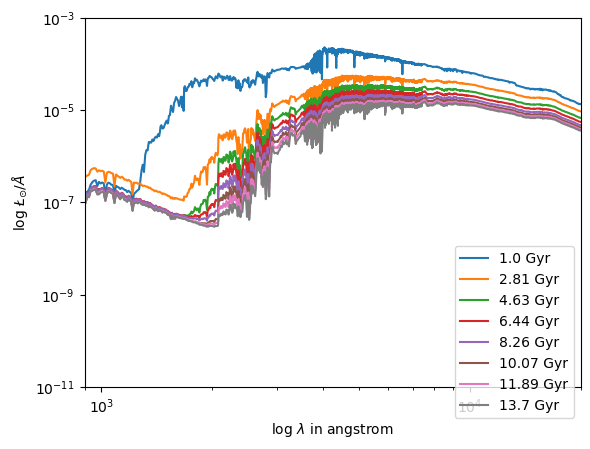

In [70]:
# Here we get the spectra of the SP
ages = np.linspace(1, 13.7, 8)


fig, ax2 = plt.subplots(1,1)

for age in tqdm(ages):
    wave, spec = sp.get_spectrum(tage=age, peraa=True)
    ax2.plot(wave, spec, label=f"{round(age,2)} Gyr")

# We cut off the plot at the Lymann limit
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(900, 20000)
ax2.set_ylim(1e-11, 1e-3)
ax2.legend(bbox_to_anchor=(1, 0.4))
ax2.set_xlabel("log $\lambda$ in angstrom")
ax2.set_ylabel("log $\L_{\odot}/\\AA$")
plt.show()

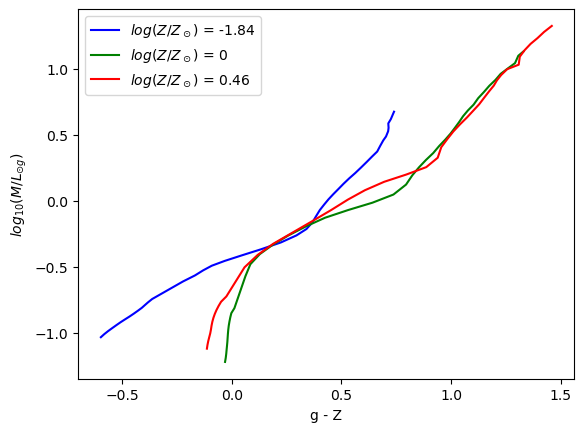

In [72]:
# Here we make a colour-M/L plot
# We can get the colour from the filters    in fsps
def flux_from_mags(mag_AB):
    '''
    params:
        - mags_AB: the magnitude of which the corresponding flux in erg s^-1 cm^-2 Hz^-1
    '''
    return 10 **( (48.60+ mag_AB) / -2.5)

ages = sp.log_age
old_mask = ages > 8



filters = fsps.find_filter('sdss')
metalicities = [-1.84, 0, 0.46]
colours = ['blue', 'green', 'red']

fig, ax = plt.subplots(1, 1)

for i, Z in enumerate(metalicities):
    sp.params['logzsol'] = Z
    mass = sp.stellar_mass[old_mask]
    sdss_mags = sp.get_mags(tage=0.0, bands=filters)[old_mask]
    lum = flux_from_mags(sdss_mags[:, 1]) / flux_from_mags(sp.filter_data()[2][13])
    ratio = mass / lum 
    colour = sdss_mags[:, 1] - sdss_mags[:, 3]
    
    ax.plot(colour, np.log10(ratio), label=f"$log(Z/Z_\odot)$ = {Z}", c=colours[i])
    ax.legend()
    ax.set_xlabel("g - Z")
    ax.set_ylabel('$log_{10}(M/L_{\odot g})$')
plt.show()

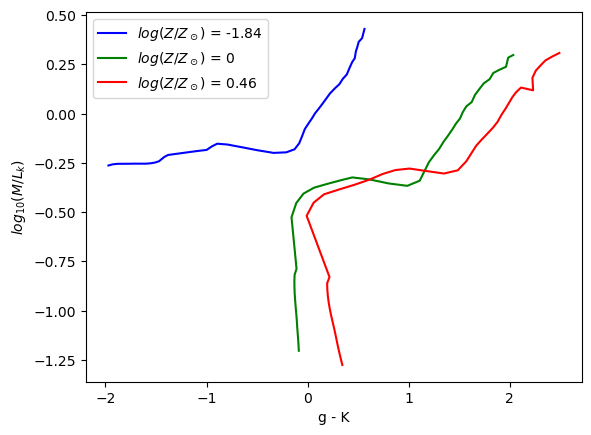

In [73]:
ages = sp.log_age
old_mask = ages > 8

sdss_filters = fsps.find_filter('sdss')
twomass_filters = fsps.find_filter('wfcam')
solarmag = sp.filter_data()[2][72]
metalicities = [-1.84, 0, 0.46]
colours = ['blue', 'green', 'red']

fig3, ax3 = plt.subplots(1, 1)

for i, Z in enumerate(metalicities):
    sp.params['logzsol'] = Z
    mass = sp.stellar_mass[old_mask]
    sdss_mags = sp.get_mags(tage=0.0, bands=sdss_filters)[old_mask]
    k_mag = sp.get_mags(tage=0.0, bands=twomass_filters)[old_mask]

    lum = flux_from_mags(k_mag[:,4]) / flux_from_mags(sp.filter_data()[2][72])
    ratio = mass / lum
    colour = sdss_mags[:, 1] - k_mag[:, 4]

    ax3.plot(colour, np.log10(ratio), label=f"$log(Z/Z_\odot)$ = {Z}", c=colours[i])
    ax3.legend()
    ax3.set_xlabel("g - K")
    ax3.set_ylabel('$log_{10}(M/L_k)$')
plt.show()
